In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from scipy.stats import norm, poisson
from scipy.optimize import minimize

# Likelihood

\begin{equation}
    \mathcal{L}_{comb}(\mathbf{x},\theta) = \prod^{N}_{i=1} \mathcal{L}(x_{i},\theta)
\end{equation}

\begin{equation}
    \ln \mathcal{L}_{comb}(\mathbf{x}, \theta) = \sum^{N}_{i=1} \ln \mathcal{L}(x_{i},\theta)
\end{equation}

Maximum likelihood estimator:

\begin{equation}
    \hat{\theta} = \underset{\theta}{\text{argmax}} ~ \mathcal{L}(\theta,\mathbf{x})
\end{equation}

\begin{equation}
    \hat{\theta} = \underset{\theta}{\text{argmin}} ~ \left[ - \ln \mathcal{L}(\theta,\mathbf{x}) \right]
\end{equation}

In [3]:
def NLL(pars, x):
    mult = 2.0
    mu = pars[0]
    sigma = pars[1]
    ll = mult*(-0.5 * np.log(2.0*np.pi) - np.log(sigma) - (x-mu)**2/(2.0*sigma**2))
    return -ll

In [4]:
def NLL_comb(pars, X, NLL):
    nll_sum = 0
    for xi in X:
        nll = NLL(pars, xi)
        nll_sum += nll
    return nll_sum

In [5]:
def NLL_comb_conditional(par_opt, par_fix, x, NLL):
    pars = (par_opt, par_fix)
    nll_sum = NLL_comb(pars, x, NLL)
    return nll_sum

Generate a datasample

In [6]:
x_sample = norm.rvs(size=100, loc=5.0, scale=2.0)

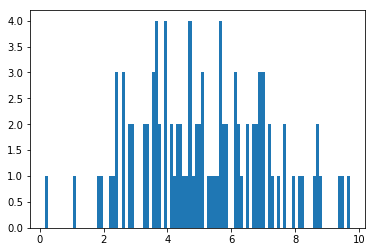

In [7]:
f,a = plt.subplots()
n, bins, patches = a.hist(x_sample, bins=100)

Parameter scan

In [8]:
x = np.linspace(4.0, 6.0, 100)
y = np.linspace(0.1, 3.0, 100)
X,Y = np.meshgrid(x,y)

In [9]:
Z = NLL_comb((X,Y), x_sample, NLL)

In [10]:
def plot_NLL(X,Y,Z):
    f,a = plt.subplots()
    
    pcm = a.pcolor(X, Y, Z, cmap='viridis_r', norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
    cb = f.colorbar(pcm, ax=a, extend='max')
    cb.set_label(r'$-2\ln \mathcal{L}$')
        
    min_index = np.argmin(Z)
    min_value = np.min(Z)
    a.scatter(X.flatten()[min_index], Y.flatten()[min_index], c='k', marker='x')
    
    a.contour(X,Y,Z, [min_value+1.0, min_value+4.0, min_value+9.0])
    
    label = "Min value: {:.2e}".format(min_value)
    a.text(0.2, 0.1, label, transform=a.transAxes)
    return f,a

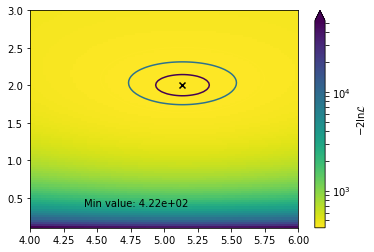

In [11]:
f,a = plot_NLL(X,Y,Z)

## MLE

In [12]:
def MLE(NLL_comb, x0, args, method='Nelder-Mead'):
    m = minimize(fun=NLL_comb, x0=x0, args=args, method=method)
    return m

In [13]:
MLE(NLL_comb, x0=(1.0, 1.0),  args=(x_sample, NLL))

 final_simplex: (array([[ 5.137182  ,  1.99400035],
       [ 5.1372329 ,  1.99398106],
       [ 5.13710431,  1.99393612]]), array([ 421.81310266,  421.81310267,  421.81310284]))
           fun: 421.81310266338988
       message: 'Optimization terminated successfully.'
          nfev: 93
           nit: 48
        status: 0
       success: True
             x: array([ 5.137182  ,  1.99400035])

In [14]:
MLE(NLL_comb_conditional, x0=1.0, args=(2.0, x_sample, NLL))

 final_simplex: (array([[ 5.13720703],
       [ 5.13710938]]), array([ 421.81492328,  421.81492342]))
           fun: 421.81492327537177
       message: 'Optimization terminated successfully.'
          nfev: 42
           nit: 21
        status: 0
       success: True
             x: array([ 5.13720703])